In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
# Define the parameters
SI = 0.0002    # Insulin sensitivity
EG0 = 0.00005025   # Glucose effectiveness at zero insulin
R0 = 1.4      # Net rate of glucose production at zero glucose
sigma = 0.02  # Maximal rate of insulin secretion
alpha = 105**2 # Glucose concentration at half maximal insulin secretion rate
k = 0.08       # Rate constant for insulin clearance
SK=2
m=4
r=80
# Parameters for the slow subsystem
d0 = 0.06     # Death rate at zero glucose
r1 = 0.84e-3  # First order replication rate coefficient
r2 = 0.24e-5  # Second order death rate coefficient


In [55]:
# Define the nullcline functions
def glucose_nullcline(I, EG0, SI, R0):
    return (R0+SK/(r**m+I**m)) / (EG0 + SI * I)

In [56]:
def insulin_nullcline(G, beta, sigma, alpha, k):
    return (beta * sigma * G**2) / (alpha + G**2) / k

# Glucose, Insulin, Beta-cell Mass Dynamics

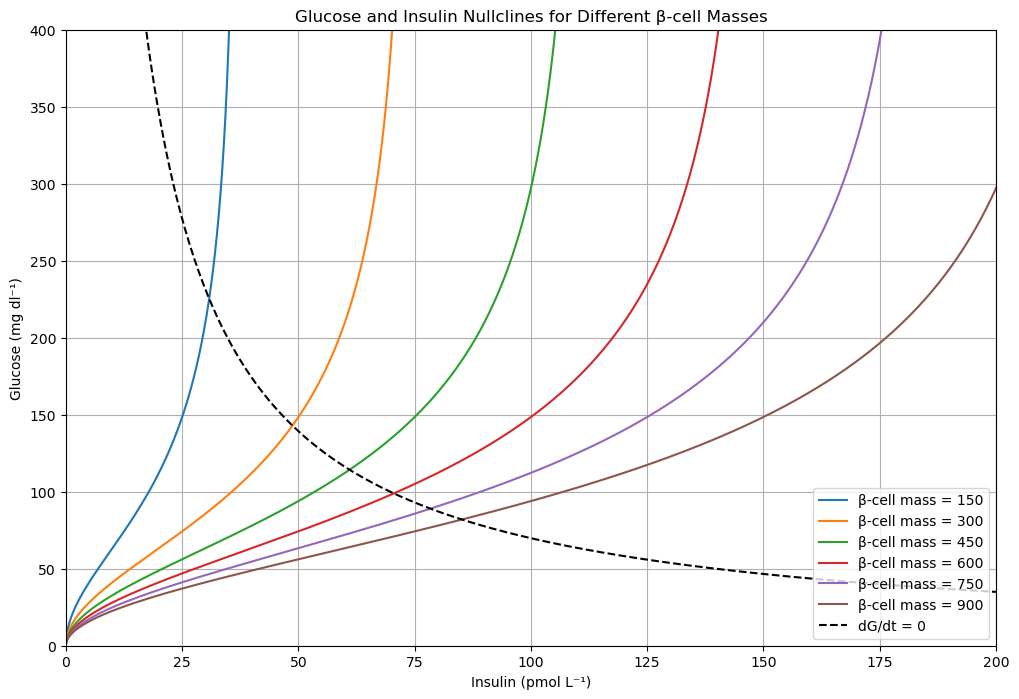

In [57]:
# Define the range for insulin and glucose
I_range = np.linspace(0, 200, 400)  # Extend insulin range for plotting nullclines
G_range = np.linspace(0, 400, 400)  # Extend glucose range for plotting nullclines

# Calculate nullclines for different β-cell mass values
betas = [150, 300, 450, 600, 750, 900]
nullclines_data = []
for beta in betas:
    I_nullcline = insulin_nullcline(G_range, beta, sigma, alpha, k)
    nullclines_data.append((G_range, I_nullcline))

# Plot the nullclines for insulin dynamics
plt.figure(figsize=(12, 8))
for i, beta in enumerate(betas):
    plt.plot(nullclines_data[i][1], nullclines_data[i][0], label=f'β-cell mass = {beta}')

# Now plot the dG/dt = 0 nullcline (glucose nullcline)
G_nullcline = glucose_nullcline(I_range, EG0, SI, R0)
plt.plot(I_range, G_nullcline, label='dG/dt = 0', color='black', linestyle='--')

# Add labels and legend
plt.xlabel('Insulin (pmol L⁻¹)')
plt.ylabel('Glucose (mg dl⁻¹)')
plt.title('Glucose and Insulin Nullclines for Different β-cell Masses')
plt.legend()
plt.grid(True)
plt.xlim(0, 200)
plt.ylim(0, 400)
plt.show()


## Phase Portrait

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


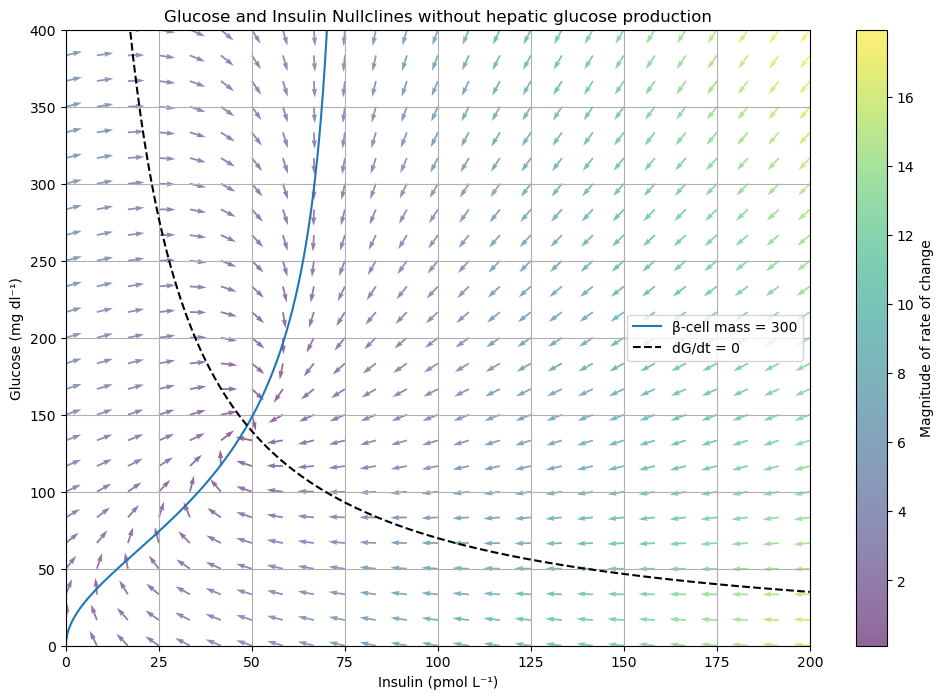

In [65]:
nx, ny = 25, 25
x = np.linspace(0, 200, nx)
y = np.linspace(0, 400, ny)
X, Y = np.meshgrid(x, y)

beta = 300
dy = R0 - (EG0 + SI * X) * Y
dx = (beta * sigma * Y**2) / (alpha + Y**2) - k * X

M = np.sqrt(dx**2 + dy**2)

dx_norm = dx / M
dy_norm = dy / M

plt.figure(figsize=(12, 8))
quiver = plt.quiver(X, Y, dx_norm, dy_norm, M, alpha=0.6, cmap='viridis')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Mutually Inhibiting Circuit Phase Plane')

# Define the range for insulin and glucose
I_range = np.linspace(0, 200, 400)  # Extend insulin range for plotting nullclines
G_range = np.linspace(0, 400, 400)  # Extend glucose range for plotting nullclines

# Calculate nullclines for different β-cell mass values
nullclines_data = []
I_nullcline = insulin_nullcline(G_range, beta, sigma, alpha, k)

plt.plot(I_nullcline, G_range, label=f'β-cell mass = {beta}')
G_nullcline = glucose_nullcline(I_range, EG0, SI, R0)
plt.plot(I_range, G_nullcline, label='dG/dt = 0', color='black', linestyle='--')

# Add labels and legend
plt.xlabel('Insulin (pmol L⁻¹)')
plt.ylabel('Glucose (mg dl⁻¹)')
plt.title('Glucose and Insulin Nullclines without hepatic glucose production')
plt.colorbar(quiver, label='Magnitude of rate of change')
plt.grid(True)
plt.legend()
plt.xlim(0, 200)
plt.ylim(0, 400)
plt.show()

## Global Behaviour of Slow Subsystem

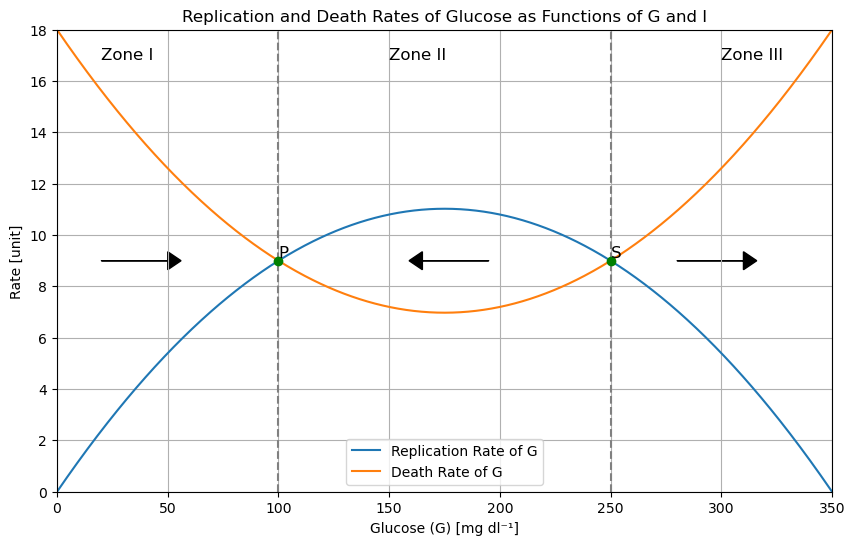

In [33]:
# Define the parameters
r1 = 0.00084
r2 = 0.0000024
r1r = r1/2
r2r = r2/2
r1a = r1 - r1r
r2a = r2 - r2r
d0 = 0.06

# Define the production and degradation rate functions for G
def replication_rate_G(G):  # Add additional parameters if needed
    return (r1r * G - r2r * G * G) * beta

def death_rate_G(G):  # Add additional parameters if needed
    return (d0 - r1a * G + r2a * G * G) * beta

# Use the solution to calculate production and degradation rates of G
G_vals = np.linspace(0, 350, 1000)
replication_rates = replication_rate_G(G_vals)
death_rates = death_rate_G(G_vals)

# Create the plot for production and degradation rates of G
plt.figure(figsize=(10, 6))
plt.plot(G_vals, replication_rates, label='Replication Rate of G')
plt.plot(G_vals, death_rates, label='Death Rate of G')
plt.xlabel('Glucose (G) [mg dl⁻¹]')
plt.ylabel('Rate [unit]')
plt.title('Replication and Death Rates of Glucose as Functions of G and I')
plt.legend()
plt.grid(True)

# Add labels and annotations for zones
plt.axvline(x=100, color='grey', linestyle='--')
plt.axvline(x=250, color='grey', linestyle='--')
plt.text(20, 17, 'Zone I', fontsize=12, verticalalignment='center')
plt.text(150, 17, 'Zone II', fontsize=12, verticalalignment='center')
plt.text(300, 17, 'Zone III', fontsize=12, verticalalignment='center')
plt.xlim(0, 350)
plt.ylim(0, 18)

start_x = [20, 195, 280]
start_y = 9
dx = 30
dy = 0

plt.arrow(start_x[0], start_y, dx, dy, head_width=0.7, head_length=6, fc='k', ec='k')
plt.arrow(start_x[1], start_y, -1 * dx, dy, head_width=0.7, head_length=6, fc='k', ec='k')
plt.arrow(start_x[2], start_y, dx, dy, head_width=0.7, head_length=6, fc='k', ec='k')

# Fixed points
plt.plot(100, 9, 'go')
plt.plot(250, 9, 'go')
plt.text(100, 9, 'P', fontsize=12, verticalalignment='bottom')
plt.text(250, 9, 'S', fontsize=12, verticalalignment='bottom')

plt.show()


## Global behaviour of betaIG model

In [34]:
import numpy as np
import plotly.graph_objects as go

# Differential equations
def dG_dt(G, I, beta):
    return R0 - (EG0 + SI * I) * G

def dI_dt(G, I, beta):
    return beta * sigma * G**2 / (alpha + G**2) - k * I

def dbeta_dt(G, I, beta):
    return beta * (r1 * G - r2 * G * G - d0)

# Define the range for G, I, and beta
G_range = np.linspace(0, 400, 10)
I_range = np.linspace(0, 200, 10)
beta_range = np.linspace(0, 1200, 10)

# Create meshgrid for G, I, and beta
G_grid, I_grid, beta_grid = np.meshgrid(G_range, I_range, beta_range, indexing='ij')

# Calculate the rate of change at each point in the grid
dG = dG_dt(G_grid, I_grid, beta_grid)
dI = dI_dt(G_grid, I_grid, beta_grid)
dbeta = dbeta_dt(G_grid, I_grid, beta_grid)

# Normalize the vectors for visualization purposes
magnitude = np.sqrt(dG**2 + dI**2 + dbeta**2)
dG_normalized = dG / magnitude
dI_normalized = dI / magnitude
dbeta_normalized = dbeta / magnitude

# Create the 3D quiver plot using Plotly
fig = go.Figure(data=go.Cone(
    x=beta_grid.flatten(),
    y=G_grid.flatten(),
    z=I_grid.flatten(),
    u=dbeta_normalized.flatten(),
    v=dG_normalized.flatten(),
    w=dI_normalized.flatten(),
    sizemode="absolute",
    sizeref=2  # Adjust this as needed
))

# Set the layout for the 3D plot
fig.update_layout(
    title='3D Phase Portrait',
    scene=dict(
        yaxis_title='Glucose (G)',
        zaxis_title='Insulin (I)',
        xaxis_title='Beta-cell mass (β)'
    )
)

# Show the plot
fig.show()


# Regulated Hyperglycemia

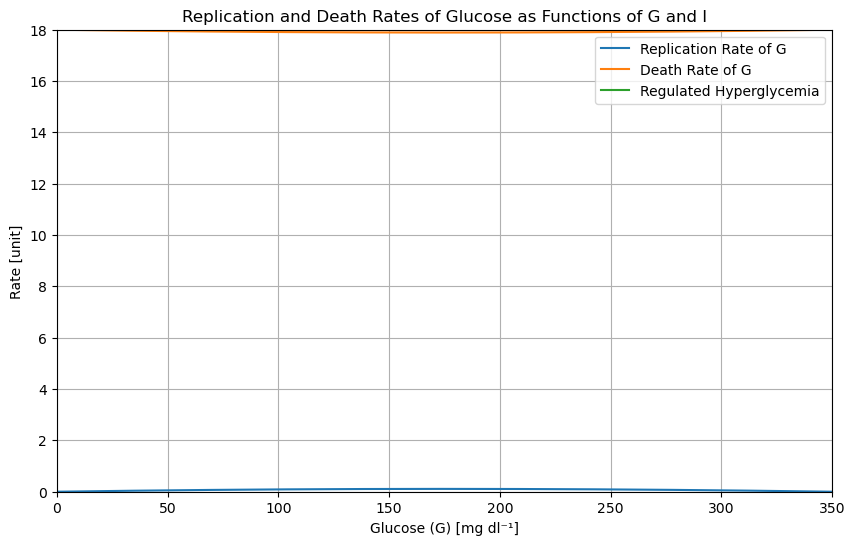

In [24]:
# Define the parameters
r1 = 0.00084
r2 = 0.0000024
r1r = r1/2
r2r = r2/2
r1a = r1 - r1r
r2a = r2 - r2r
d0 = 0.06

# Define the production and degradation rate functions for G
def replication_rate_G(G):  # Add additional parameters if needed
    return (r1r * G - r2r * G * G) * beta

def death_rate_G(G):  # Add additional parameters if needed
    return (d0 - r1a * G + r2a * G * G) * beta

# Use the solution to calculate production and degradation rates of G
G_vals = np.linspace(0, 350, 1000)
replication_rates = replication_rate_G(G_vals)
death_rates = death_rate_G(G_vals)


# Create the plot for production and degradation rates of G
plt.figure(figsize=(10, 6))
plt.plot(G_vals, replication_rates, label='Replication Rate of G')
plt.plot(G_vals, death_rates, label='Death Rate of G')
plt.plot(G_vals, death_rates + 3, label='Regulated Hyperglycemia')
plt.xlabel('Glucose (G) [mg dl⁻¹]')
plt.ylabel('Rate [unit]')
plt.title('Replication and Death Rates of Glucose as Functions of G and I')
plt.legend()
plt.grid(True)

plt.xlim(0, 350)
plt.ylim(0, 18)

start_x = [20, 195, 280]
start_y = 9
dx = 30
dy = 0

plt.show()


## Glucose, Insulin Nullclines

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


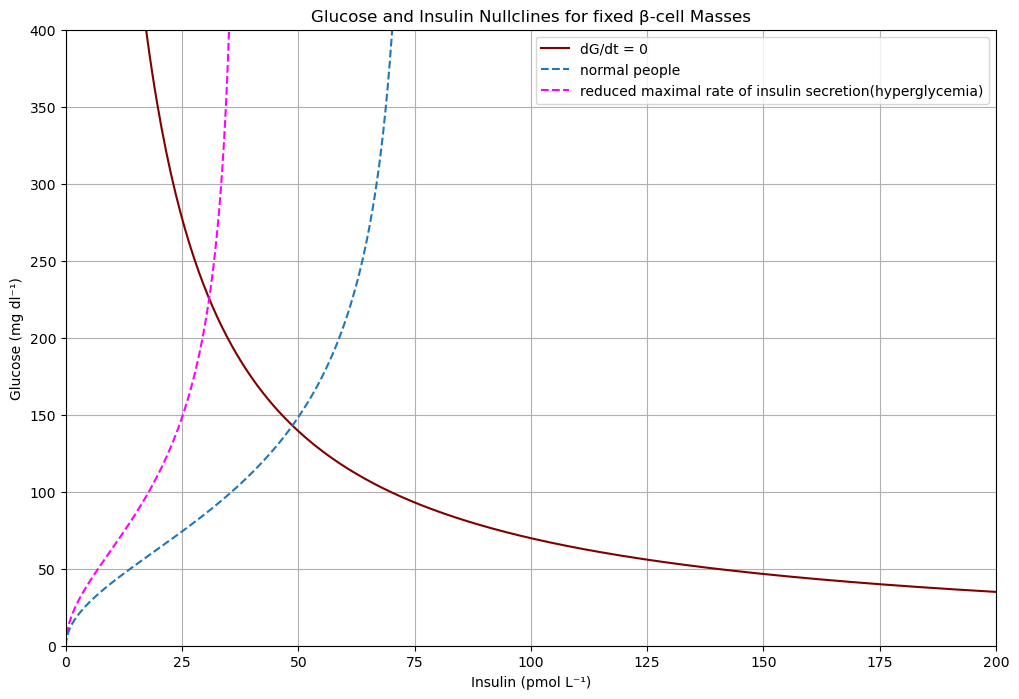

In [45]:
nx, ny = 25, 25
x = np.linspace(0, 200, nx)
y = np.linspace(0, 400, ny)
X, Y = np.meshgrid(x, y)

beta = 300
dy = R0 - (EG0 + SI * X) * Y
dx = (beta * sigma * Y**2) / (alpha + Y**2) - k * X

M = np.sqrt(dx**2 + dy**2)

dx_norm = dx / M
dy_norm = dy / M

plt.figure(figsize=(12, 8))
# quiver = plt.quiver(X, Y, dx_norm, dy_norm, M, alpha=0.6, cmap='viridis')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Mutually Inhibiting Circuit Phase Plane')

# Define the range for insulin and glucose
I_range = np.linspace(0, 200, 400)  # Extend insulin range for plotting nullclines
G_range = np.linspace(0, 400, 400)  # Extend glucose range for plotting nullclines

# Calculate nullclines for different β-cell mass values
nullclines_data = []
I_nullcline = insulin_nullcline(G_range, 300, sigma, alpha, k)
I_nullcline_hyperglycemia = insulin_nullcline(G_range, 300, sigma/2, alpha, k)

G_nullcline = glucose_nullcline(I_range, EG0, SI, R0)
G_nullcline_hyperglycemia = glucose_nullcline(I_range, EG0, SI/2, R0)

plt.plot(I_range, G_nullcline, label='dG/dt = 0', color='maroon')
plt.plot(I_nullcline, G_range, label='normal people', linestyle='--')
plt.plot(I_nullcline_hyperglycemia, G_range, label='reduced maximal rate of insulin secretion(hyperglycemia)', color='magenta', linestyle='--')

# Add labels and legend
plt.xlabel('Insulin (pmol L⁻¹)')
plt.ylabel('Glucose (mg dl⁻¹)')
plt.title('Glucose and Insulin Nullclines for fixed β-cell Masses')
plt.colorbar(quiver, label='Magnitude of rate of change')
plt.grid(True)
plt.legend()
plt.xlim(0, 200)
plt.ylim(0, 400)
plt.show()

# Bifurcation

C:\Users\LiuYitong\AppData\Local\Temp\ipykernel_17296\3952780712.py:8: RuntimeWarning:

invalid value encountered in sqrt

C:\Users\LiuYitong\AppData\Local\Temp\ipykernel_17296\3952780712.py:13: RuntimeWarning:

invalid value encountered in sqrt



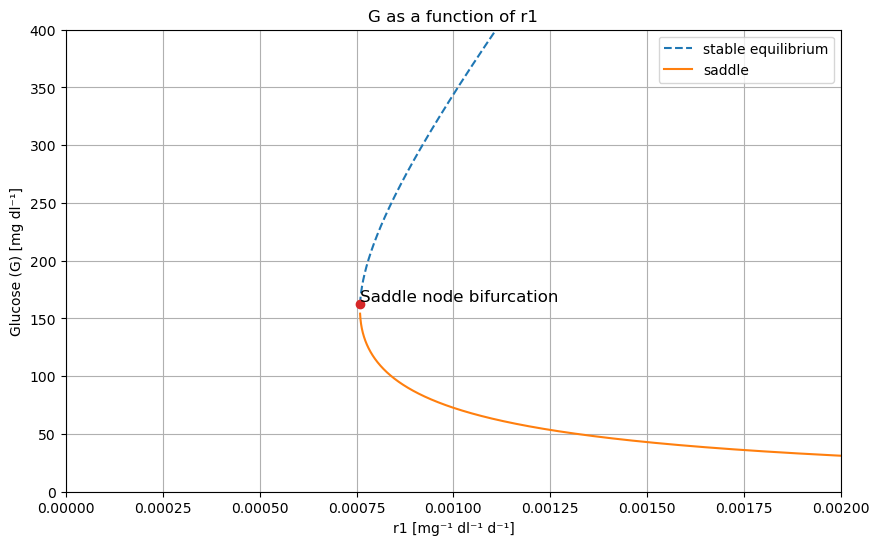

In [53]:
r1 = 0.84 * 1e-3
d0 = 0.06
r2 = 0.24 * 1e-5

def quadratic_equation_in_G(r1):
    # equation is -d0 + r1G - r2G^2 = 0
    # simplified equation is r2G^2 - r1G + d0 = 0
    return (r1 + np.sqrt(r1**2 - 4 * r2 * d0)) / (2 * r2)

def quadratic_equation_in_G_negative(r1):
    # equation is -d0 + r1G - r2G^2 = 0
    # simplified equation is r2G^2 - r1G + d0 = 0
    return (r1 - np.sqrt(r1**2 - 4 * r2 * d0)) / (2 * r2)

# range of r1 values is 0 to 0.002 at step of 0.0001
r1_range = np.linspace(0, 0.002, 4000)
G_values = quadratic_equation_in_G(r1_range)
G_values_negative = quadratic_equation_in_G_negative(r1_range)
G_values_const = np.ones(3080) * 600
r1_range_later = np.linspace((0.002 / 4000) * 3080, 0.002, 920)
G_values_const_later = np.ones(920) * 600

plt.figure(figsize=(10, 6))
plt.plot(r1_range, G_values, linestyle='--',label='stable equilibrium')
plt.plot(r1_range, G_values_negative,label='saddle')
plt.plot(r1_range[:3080], G_values_const)
plt.plot(r1_range_later, G_values_const_later, linestyle='--', color='g')

plt.plot(r1_range[~np.isnan(G_values)][0], G_values[~np.isnan(G_values)][0], 'o') # saddle node bifurcation
plt.text(r1_range[~np.isnan(G_values)][0], G_values[~np.isnan(G_values)][0], 'Saddle node bifurcation', fontsize=12, verticalalignment='bottom')
plt.plot(r1_range[3080], 600, 'o') # Transcritical bifurcation
# plt.text(r1_range[3080], 600, 'Transcritical bifurcation', fontsize=12, verticalalignment='top')

plt.xlabel('r1 [mg⁻¹ dl⁻¹ d⁻¹]')
plt.ylabel('Glucose (G) [mg dl⁻¹]')
plt.title('G as a function of r1')
plt.legend()
plt.grid(True)
plt.xlim(0, 0.002)
plt.ylim(0, 400)
plt.show()

## Difference in Subsystem Dynamics

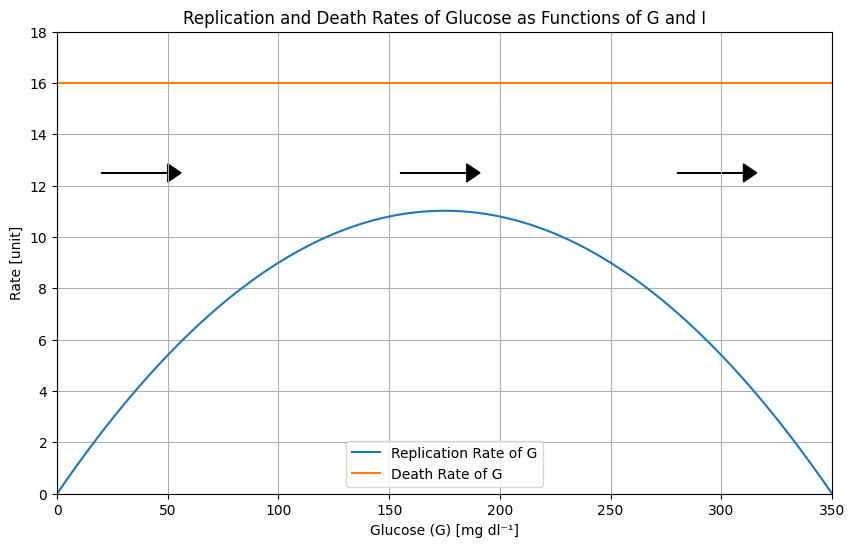

In [51]:
# Define the parameters
r1 = 0.00084
r2 = 0.0000024
r1r = r1/2
r2r = r2/2
r1a = r1 - r1r
r2a = r2 - r2r
d0 = 0.06

# Define the production and degradation rate functions for G
def replication_rate_G(G):  # Add additional parameters if needed
    return (r1r * G - r2r * G * G) * beta

def death_rate_G(G):  # Add additional parameters if needed
    return (d0 - r1a * G + r2a * G * G) * beta

# Use the solution to calculate production and degradation rates of G
G_vals = np.linspace(0, 350, 1000)
replication_rates = replication_rate_G(G_vals)
death_rates = np.ones(1000) * 16

# Create the plot for production and degradation rates of G
plt.figure(figsize=(10, 6))
plt.plot(G_vals, replication_rates, label='Replication Rate of G')
plt.plot(G_vals, death_rates, label='Death Rate of G')
plt.xlabel('Glucose (G) [mg dl⁻¹]')
plt.ylabel('Rate [unit]')
plt.title('Replication and Death Rates of Glucose as Functions of G and I')
plt.legend()
plt.grid(True)

# Add labels and annotations for zones
plt.xlim(0, 350)
plt.ylim(0, 18)

start_x = [20, 155, 280]
start_y = 12.5
dx = 30
dy = 0

plt.arrow(start_x[0], start_y, dx, dy, head_width=0.7, head_length=6, fc='k', ec='k')
plt.arrow(start_x[1], start_y, dx, dy, head_width=0.7, head_length=6, fc='k', ec='k')
plt.arrow(start_x[2], start_y, dx, dy, head_width=0.7, head_length=6, fc='k', ec='k')

plt.show()


# Dynamical Hyperglycemia

[10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10

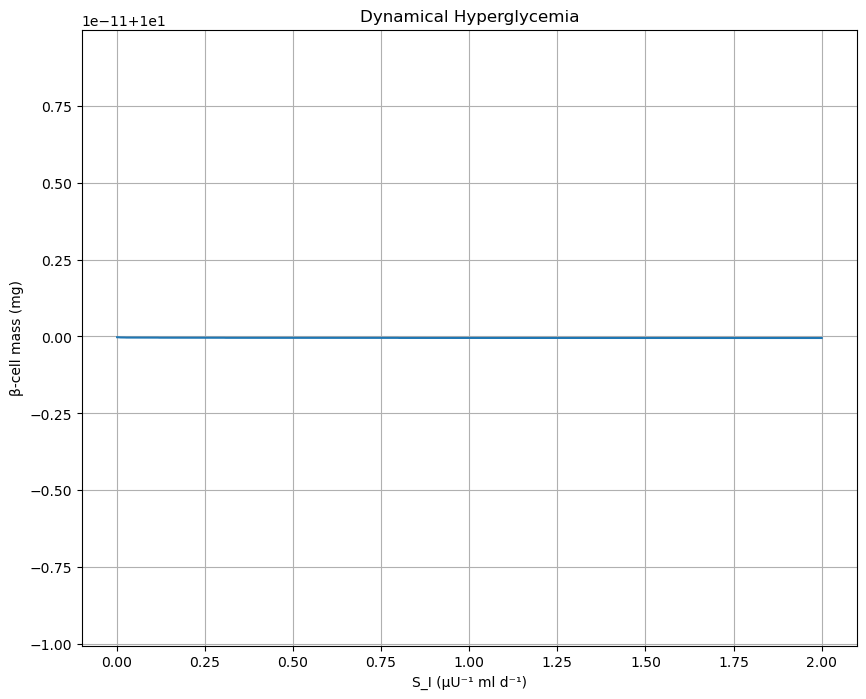

In [49]:
c1 = 0.01
r1 = 0.84 * 1e-3
r2 = 0.24 * 1e-5
d0 = 0.06
beta_0 = 10
S_I0 = 0.72 * 1e-6

def C(G):
    return (-d0 + r1 * G - r2 * G**2)

def get_beta(S_I):
    print(beta_0 * (np.exp(-1 * (C(100) / c1) * np.log(S_I/S_I0))))
    return beta_0 * (np.exp(-1 * (C(100) / c1) * np.log(S_I/S_I0)))

S_I_range = np.linspace(0.001, 2, 1000)
beta_range = get_beta(S_I_range)

plt.figure(figsize=(10, 8))
plt.plot(S_I_range, beta_range)
plt.xlabel('S_I (μU⁻¹ ml d⁻¹)')
plt.ylabel('β-cell mass (mg)')
plt.title('Dynamical Hyperglycemia')
plt.grid(True)
plt.show()

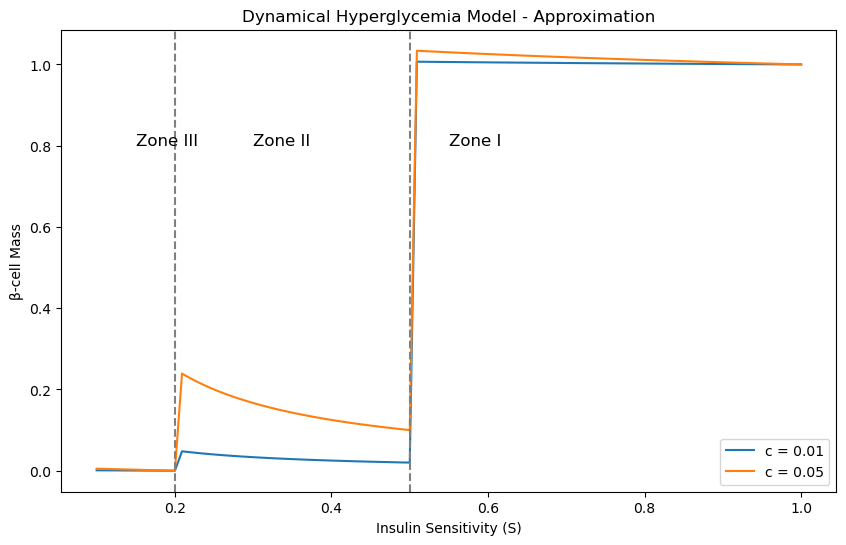

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Hypothetical functions for β-cell mass in relation to insulin sensitivity
def beta_cell_mass(S, c):
    # Simplified representation based on the description
    if S > 0.5:  # Zone I: High insulin sensitivity
        return 1 - c * np.log(S)
    elif 0.2 < S <= 0.5:  # Zone II: Intermediate
        return c / S
    else:  # Zone III: Low insulin sensitivity
        return c * (0.2 - S)

# Range of insulin sensitivities
S_values = np.linspace(0.1, 1.0, 100)

# Different rates of change in insulin sensitivity (c values)
c_values = [0.01, 0.05]  # as mentioned in the paper

# Plot
plt.figure(figsize=(10, 6))

for c in c_values:
    beta_mass = [beta_cell_mass(S, c) for S in S_values]
    plt.plot(S_values, beta_mass, label=f'c = {c}')

# Marking Zones
plt.axvline(x=0.2, color='grey', linestyle='--')
plt.axvline(x=0.5, color='grey', linestyle='--')
plt.text(0.55, 0.8, 'Zone I', fontsize=12)
plt.text(0.3, 0.8, 'Zone II', fontsize=12)
plt.text(0.15, 0.8, 'Zone III', fontsize=12)

plt.xlabel('Insulin Sensitivity (S)')
plt.ylabel('β-cell Mass')
plt.title('Dynamical Hyperglycemia Model - Approximation')
plt.legend()
plt.show()